In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ROOT="/content/drive/MyDrive/CNN implementations"
import os
os.chdir(ROOT)

In [3]:
os.getcwd()


'/content/drive/MyDrive/CNN implementations'

In [4]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D,Conv2D,Activation,MaxPooling2D,Add,AveragePooling2D
from keras.initializers import glorot_uniform
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [5]:
image_dir = '/content/drive/MyDrive/CNN implementations/flower_data'
def read_images_from_dir(base_dir, folder):
    path_folder = os.path.join(image_dir, folder)
    files_directory = os.listdir(path_folder)
    
    labels = []
    images = []
    for file in files_directory:
        if file.endswith('.jpg'):
            labels.append(folder)
            images.append(os.path.join(path_folder, file))
    return labels, images

def read_images(base_dir):
    labels = []
    images = []
    folders = os.listdir(image_dir)
    for folder in folders:
        labels_folder, images_folder = read_images_from_dir(base_dir, folder)
        labels.extend(labels_folder)
        images.extend(images_folder)
    return labels, images

labels, images = read_images(image_dir)

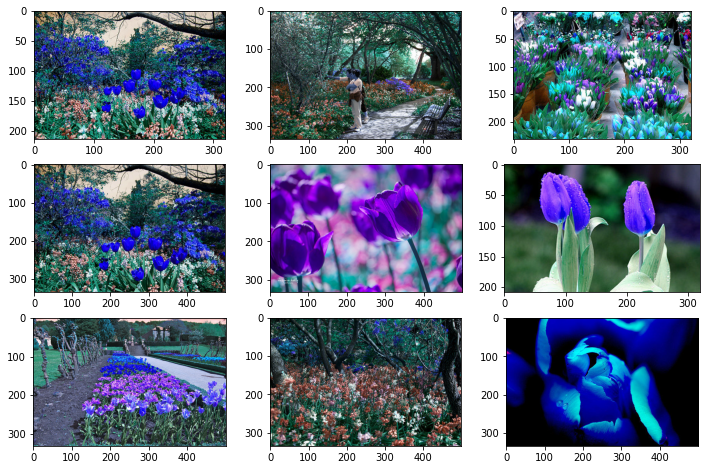

In [ ]:
import matplotlib.pyplot as plt
import cv2
cols=3
rows=3
fig, axarr = plt.subplots(cols,rows, figsize=(12, 8))
index=0
for i in range(0,cols):
    for j in range(0,rows):
        axarr[i,j].imshow(cv2.imread(images[index]))
        axarr[i,j].imshow(cv2.imread(images[index]))
        axarr[i,j].imshow(cv2.imread(images[index]))
        axarr[i,j].imshow(cv2.imread(images[index]))
        index=index+1

**Note:**
* Here i am using flower data set,this data set i downloaded from kaggle.it contains 5 classes only.There is no folders like train,test and valid. we need to do that. For this i installed "split-folders",it will help me to split the folders into train,test and valid.


In [ ]:
# Installation command
# !pip install -q split-folders

In [ ]:
# Run this command,set your path and mention ratio here,
# import splitfolders
# splitfolders.ratio("/content/drive/MyDrive/CNN implementations/flower_data", output="output", seed=100, ratio=(.8, .1, .1), group_prefix=None) 

In [ ]:
daisy_dir = os.path.join('/content/drive/MyDrive/CNN implementations/output/train/daisy')
dandelion_dir = os.path.join('/content/drive/MyDrive/CNN implementations/output/train/dandelion')
rose_dir = os.path.join('/content/drive/MyDrive/CNN implementations/output/train/rose')
sunflower_dir = os.path.join('/content/drive/MyDrive/CNN implementations/output/train/sunflower')
tulip_dir = os.path.join('/content/drive/MyDrive/CNN implementations/output/train/tulip')

#count number of files in each directory
print('Total training Daisy images :',len(os.listdir(daisy_dir)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir)))
print('Total training Rose images :',len(os.listdir(rose_dir)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir)))
print('Total training Tulip images :',len(os.listdir(tulip_dir)))

print('\n')
daisy_files = os.listdir(daisy_dir)
dandelion_files = os.listdir(dandelion_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)

print("Total len of training images",len(daisy_files+dandelion_files+rose_files+sunflower_files+tulip_files))
print("________________________________________________________________________________________")

print('\n')

daisy_dir1 = os.path.join('/content/drive/MyDrive/CNN implementations/output/test/daisy')
dandelion_dir1 = os.path.join('/content/drive/MyDrive/CNN implementations/output/test/dandelion')
rose_dir1 = os.path.join('/content/drive/MyDrive/CNN implementations/output/test/rose')
sunflower_dir1 = os.path.join('/content/drive/MyDrive/CNN implementations/output/test/sunflower')
tulip_dir1 = os.path.join('/content/drive/MyDrive/CNN implementations/output/test/tulip')

#count number of files in each directory
print('Total training Daisy images :',len(os.listdir(daisy_dir1)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir1)))
print('Total training Rose images :',len(os.listdir(rose_dir1)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir1)))
print('Total training Tulip images :',len(os.listdir(tulip_dir1)))

print('\n')
daisy_files1 = os.listdir(daisy_dir1)
dandelion_files1 = os.listdir(dandelion_dir1)
rose_files1 = os.listdir(rose_dir1)
sunflower_files1 = os.listdir(sunflower_dir1)
tulip_files1 = os.listdir(tulip_dir1)

print("Total len of test images",len(daisy_files1+dandelion_files1+rose_files1+sunflower_files1+tulip_files1))
print("________________________________________________________________________________________")
print('\n')

daisy_dir2 = os.path.join('/content/drive/MyDrive/CNN implementations/output/val/daisy')
dandelion_dir2 = os.path.join('/content/drive/MyDrive/CNN implementations/output/val/dandelion')
rose_dir2 = os.path.join('/content/drive/MyDrive/CNN implementations/output/val/rose')
sunflower_dir2 = os.path.join('/content/drive/MyDrive/CNN implementations/output/val/sunflower')
tulip_dir2 = os.path.join('/content/drive/MyDrive/CNN implementations/output/val/tulip')

#count number of files in each directory
print('Total training Daisy images :',len(os.listdir(daisy_dir2)))
print('Total training Dandelion images :',len(os.listdir(dandelion_dir2)))
print('Total training Rose images :',len(os.listdir(rose_dir2)))
print('Total training Sunflower images :',len(os.listdir(sunflower_dir2)))
print('Total training Tulip images :',len(os.listdir(tulip_dir2)))

print('\n')
daisy_files2 = os.listdir(daisy_dir2)
dandelion_files2 = os.listdir(dandelion_dir2)
rose_files2 = os.listdir(rose_dir2)
sunflower_files2 = os.listdir(sunflower_dir2)
tulip_files2 = os.listdir(tulip_dir2)

print("Total len of valid images",len(daisy_files2+dandelion_files2+rose_files2+sunflower_files2+tulip_files2))




Total training Daisy images : 611
Total training Dandelion images : 841
Total training Rose images : 627
Total training Sunflower images : 586
Total training Tulip images : 787


Total len of training images 3452
________________________________________________________________________________________


Total training Daisy images : 77
Total training Dandelion images : 106
Total training Rose images : 79
Total training Sunflower images : 74
Total training Tulip images : 99


Total len of test images 435
________________________________________________________________________________________


Total training Daisy images : 76
Total training Dandelion images : 105
Total training Rose images : 78
Total training Sunflower images : 73
Total training Tulip images : 98


Total len of valid images 430


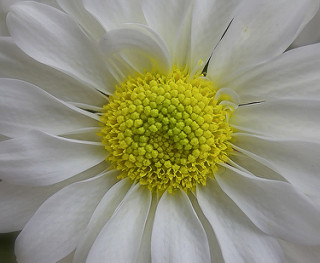

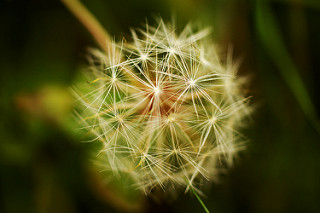

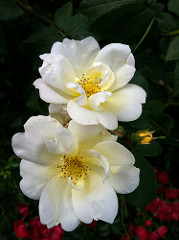

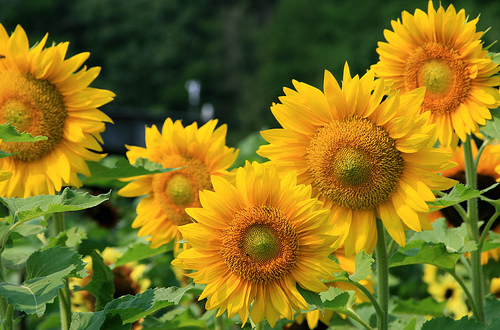

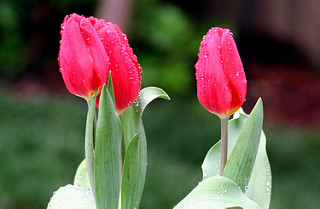

In [6]:
import cv2
from google.colab.patches import cv2_imshow
image_daisy=cv2.imread("/content/drive/MyDrive/CNN implementations/output/train/daisy/100080576_f52e8ee070_n.jpg")
cv2_imshow(image_daisy)
image_dandelion=cv2.imread("/content/drive/MyDrive/CNN implementations/output/train/dandelion/10043234166_e6dd915111_n.jpg")
cv2_imshow(image_dandelion)
image_rose=cv2.imread("/content/drive/MyDrive/CNN implementations/output/train/rose/10090824183_d02c613f10_m.jpg")
cv2_imshow(image_rose)
image_sunflower=cv2.imread("/content/drive/MyDrive/CNN implementations/output/train/sunflower/1008566138_6927679c8a.jpg")
cv2_imshow(image_sunflower)
image_tulip=cv2.imread("/content/drive/MyDrive/CNN implementations/output/train/tulip/100930342_92e8746431_n.jpg")
cv2_imshow(image_tulip)

In [ ]:
# Image preprocessing
training_dir = '/content/drive/MyDrive/CNN implementations/output/train'
training_datagen = ImageDataGenerator(
    rescale = 1./255, #normalization
    rotation_range = 40,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.2,
    zoom_range = 0.1,
    fill_mode = 'nearest',
    horizontal_flip = True)
validation_dir = '/content/drive/MyDrive/CNN implementations/output/val'
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_dir = '/content/drive/MyDrive/CNN implementations/output/test'
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size = (224,224), #rescale images to fixed size
    class_mode = 'categorical',
    batch_size = 32
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 3452 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet169(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

51888128/51877672 [==============================] - 4s 0us/step


In [ ]:
inputs = pretrained_model3.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 2
start = time.time()
history1 = model.fit(train_generator,epochs=epochs,validation_data=validation_generator,validation_steps=5,verbose=1)
end = time.time()
duration = end - start
print ('\n Model built from scratch training took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/2
108/108 [==============================] - 2010s 18s/step - loss: 0.6488 - accuracy: 0.7546 - val_loss: 0.4311 - val_accuracy: 0.8500
Epoch 2/2
108/108 [==============================] - 124s 1s/step - loss: 0.4041 - accuracy: 0.8488 - val_loss: 0.3106 - val_accuracy: 0.8750

 Model built from scratch training took 2170.76 seconds (36.2 minutes) to train for 2 epochs
